@Author: Sushant Das
@Date: 09-10-2024
@Last Modified by: Sushant Das
@Last Modified time: 09-10-2024
@Title: Python program to predict y as per x using Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#### Loading training dataset

In [2]:
train_ds = pd.read_csv("datasets/train.csv")
train_ds.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


#### Describe train dataset

In [3]:
train_ds.shape


(700, 2)

In [4]:
train_ds.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [5]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


#### Check null values in training dataset

In [6]:
print(train_ds.isnull().sum())

x    0
y    1
dtype: int64


#### dropping null values from training dataset

In [7]:
train_ds.dropna(inplace=True)

#### Loading test dataset

In [9]:
test_ds = pd.read_csv("datasets/test.csv")
test_ds.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [10]:
test_ds.shape

(300, 2)

#### Checking for null values in test dataset

In [11]:
print(test_ds.isnull().sum())

x    0
y    0
dtype: int64


#### Splitting train and test datasets

In [12]:
x_train = train_ds[['x']]
y_train = train_ds['y']
x_test = test_ds[['x']]
y_test = test_ds['y']

In [13]:
print(f"Training set size: {x_train.shape[0]}")
print(f"Testing set size: {x_test.shape[0]}")

Training set size: 699
Testing set size: 300


In [14]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### Training the model

In [15]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: 49.939869170457804
Coefficient: [28.95283303]


#### Testing the model

In [16]:
y_pred = model.predict(x_test_scaled)

In [17]:
y_test = y_test.values.flatten() if hasattr(y_test, 'values') else y_test.flatten()

y_pred = y_pred.flatten() if hasattr(y_pred, 'shape') and len(y_pred.shape) > 1 else y_pred

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

      Actual  Predicted
0  79.775152  76.943276
1  23.177279  20.906519
2  25.609262  21.907175
3  17.857388  19.905862
4  41.849864  35.916364


#### Visualizing the regression line

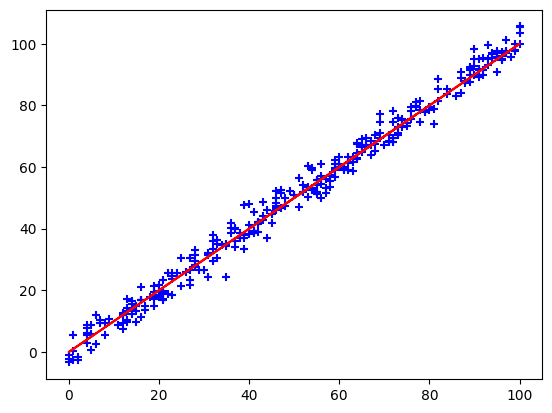

In [18]:
plt.scatter(x_test, y_test, color='blue', label='Actual', marker='+')
plt.plot(x_test, y_pred, color='red', label='Regression Line')

#### Checking model accuracy

In [19]:
mean_squared_error(y_pred, y_test)

9.43292219203933

In [20]:
r2_score(y_test, y_pred)

0.9888014444327563